In [1]:
ID = "101615093"

# Assignment 5 - Social Media and Public Health

The topic of week 5 is **social media and public health**. In the age of social media, social media platforms serve as public space for people to broadcast information, thoughts, and feelings about their daily lives [1]. Analyzing social media posts can reveal valuable insights into various topics, ranging from a mental disorders and risk suicide behavior to other mental health concerns [7]. This assignment will guide you through the process of cleaning, exploring, analyzing, and visualizing a dataset of tweets related to vaccinations.

**Overview**: In this assignment, you will work with a dataset of tweets related to vaccinations. You will clean and prepare the data for Natural language processing (NLP) analysis, explore the dataset through various visualizations, analyze the linguistic properties using the [Linguistic Inquiry and Word Count]((https://www.liwc.net/LIWC2007LanguageManual.pdf)), and finally conduct sentiment analysis using popular libraries -- [VADER](https://github.com/cjhutto/vaderSentiment#features-and-updates).

# Learning outcomes

Upon finishing this assignment, you will be able to ...

1. Gain hands-on experience with data cleaning and preparation for natural language processing (NLP).
2. Learn to explore and visualize textual data from different perspectives.
3. Apply linguistic analysis using the Linguistic Inquiry and Word Count (LIWC) lexicon.
4. Conduct sentiment analysis using existing libraries like VADER.

In this notebook, we'll walk through the steps of performing sentiment analysis on tweets related to vaccination. The process is broken down into four five parts:

## Table of Contents
1. **[Understanding Our Dataset and Features](#section1)** 
2. **[Data Cleaning and Preparation](#section2)** 
3. **[Exploratory Data Analysis](#section3)** 
4. **[Linguistic Analysis with LIWC Lexicon](#section4)** 
5. **[Sentiment Analysis](#section5)** 

Let's start with the first part.


## 1 Understanding Our Dataset and Features <a class="anchor" id="section1"></a>
The rise of social media has provided researchers with a valuable new perspective to gain insights into human behavior. By lowering barriers, social media allows easier access to vulnerable populations, enabling them to participate in online activities such as seeking social support, exchanging information, and maintaining social connections [1]. Previous studies have employed social media posts to investigate mental disorders [2], assess suicide risk behavior [3], and address other mental health concerns [4]. Social media presents real-time and post updates on mental health status, reducing bias stemming from retrospective analysis and facilitating timely intervention or even prediction of high-risk suicidal behaviors.

For this assignment, we are working with a small dataset consisting of Twitter posts covering various topics related to COVID-19, spanning from `2020-12-12` to `2021-11-23`. All posts are in the English language.

We'll begin by importing the necessary libraries/packages.

In [2]:
# uncomment it you don't have this package 
#!pip install liwc

# uncomment it you don't have this package 
#!pip install vaderSentiment

In [3]:
# Necessary libraries and modules
import json                            # For handling JSON formatted data
import os                              # Operating system dependent functionalities
import pandas as pd                    # Data manipulation and analysis library
import numpy as np                     # Numerical operations
import seaborn as sns                  # Advanced data visualization library
import matplotlib.pyplot as plt        # Plotting and visualization
import matplotlib.ticker as ticker     # Customizing tick locations and labels
from tqdm.notebook import tqdm         # Interactive progress bar
from datetime import datetime          # Date and time operations
import glob                            # Unix style pathname pattern expansion
import re                              # Regular expression operations
from collections import Counter        # Container to count occurrences

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setting up visualization properties
sns.set(font_scale=1.4, style="white")

# Setting up data directory based on the environment
if 'AALTO_JUPYTERHUB' in os.environ:
    DATA = '/coursedata/pa5/'  # If in Aalto University's Jupyter Hub
else:
    DATA = './data/'           # Default data directory


Next, we'll proceed to import the data from the **vaccination_all_tweets.csv** file. Due to limited computing resources, we will work with a small sample of the dataset, as analyzing social media data typically involves large-scale datasets containing millions of posts.

In [4]:
# Load data
tweets_df = pd.read_csv(DATA + "vaccination_all_tweets.csv", index_col=None)
print(tweets_df.shape)

(226895, 16)


In [5]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
# To reduce the size and make computations faster, sample 1% of the dataframe.
# The `random_state` parameter ensures reproducibility of the sample. Do not change it
tweets_df = tweets_df.sample(frac=0.01, random_state=42)
print(tweets_df.shape)
tweets_df.head()

(2269, 16)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
205784,1448357099193479169,"Sarah Tallent, DNP, CPNP-AC","North Carolina, USA",AC-PNP and instructor | family-centered care a...,2020-04-29 20:28:02,188,472,569,False,2021-10-13 18:36:56,Got that power boost 💉🦠 \n\nI do it for myself...,['PfizerBiontech'],Twitter for iPhone,1,3,False
199055,1446740730920112130,Boldsky,Bengaluru,One-stop solution for your lifestyle needs. Li...,2009-05-15 06:54:30,6313,1791,537,True,2021-10-09 07:34:04,Bharat Biotech Submits Clinical Trial Data Of ...,"['BharatBiotech', 'COVAXIN', 'childrens']",Twitter Web App,0,0,False
86614,1398238895884566528,Kumar Kishore Kalita,Guwahati,Born and bred like a Soldier...,2011-07-01 19:26:21,80,194,10,False,2021-05-28 11:25:05,@Arogyasetu I am unable to get online slots fo...,NaN,Twitter for Android,0,0,False
93951,1400920849549516803,eLéPhunk,NaN,NaN,2014-05-16 04:25:35,211,50,1384,False,2021-06-04 21:02:13,@normanswan That's why we need #Covaxin @norma...,"['Covaxin', 'mRNA', 'Pfizer', 'Moderna']",Twitter for Android,0,8,False
101079,1403598002632146944,Mugwagwa Trust 🇿🇼,"Pretoria, South Africa","Christian, academic/educator, politician and w...",2016-02-24 21:05:36,3133,2576,46268,False,2021-06-12 06:20:16,So yesterday I took my #SecondDose of the #Sin...,"['SecondDose', 'Sinovac']",Twitter for Android,3,9,False


After importing the data, our next step is to examine the data's datatypes and identify any potential missing observations.

In [7]:
# Inspect the Data
print(tweets_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 205784 to 212911
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2269 non-null   int64 
 1   user_name         2269 non-null   object
 2   user_location     1617 non-null   object
 3   user_description  2107 non-null   object
 4   user_created      2269 non-null   object
 5   user_followers    2269 non-null   int64 
 6   user_friends      2269 non-null   int64 
 7   user_favourites   2269 non-null   int64 
 8   user_verified     2269 non-null   bool  
 9   date              2269 non-null   object
 10  text              2269 non-null   object
 11  hashtags          1726 non-null   object
 12  source            2265 non-null   object
 13  retweets          2269 non-null   int64 
 14  favorites         2269 non-null   int64 
 15  is_retweet        2269 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 270.3+ KB
No

The DataFrame comprises the following columns:

- id: A unique identifier for the requested Tweet.
- user_name: The Twitter screen name, handle, or alias that the user identifies themselves with. Usernames are typically up to 15 characters long, but historical accounts might have longer names. They are unique but subject to change.
- user_location: The location provided in the user's profile, if the user specified one. This value may not always indicate a valid location and can be fuzzily evaluated during location-based searches.
- user_description: The text of the user's profile description (bio) if provided.
- user_created: The UTC datetime when the user account was created on Twitter.
- user_followers: The number of followers of the tweet owner.
- user_friends: The number of accounts the tweet owner follows.
- user_favourites: The number of favorite tweets the user has.
- date: The creation time of the Tweet.
- text: The actual UTF-8 text content of the Tweet.
- hashtags: Hashtags used in the tweets.
- source: The name of the app from which the user Tweeted.
- retweets: The number of times the tweet has been retweeted.
- favorites: The number of times the tweet has been 'favourited' (liked, similar to Facebook terminology).
- is_retweet: A boolean indicating whether the Tweet is a retweet (True) or an original tweet (False).

In [8]:
tweets_df.isnull().sum()

id                    0
user_name             0
user_location       652
user_description    162
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            543
source                4
retweets              0
favorites             0
is_retweet            0
dtype: int64

Indeed, we observed that certain columns, such as user_location, user_description, hashtags, and source, contain missing values. However, for this assignment, our main focus will be on the text column, which fortunately doesn't have any missing values.

## 2 Data Cleaning and Preprocessing <a class="anchor" id="section2"></a>

Before delving into data analysis, it's pivotal to clean and preprocess our data. This step ensures that we extract genuine insights when applying natural language processing (NLP) techniques. 

The function provided below primarily cleans our dataset by removing:
- Hyperlinks
- `@mentions`
- Special characters
- Emojis
- Remove extra spaces

For this purpose, we utilize the `re` module, short for **Regular Expressions**. The heart of this module is the search for patterns (denoted as `r'pattern'`) and the subsequent replacement with another string (in this case, an empty string).

**Tip**: If you're intrigued by regular expressions and wish to practice or learn more, consider using this handy online tool: [Regexr](https://regexr.com/).


In [9]:
def pre_processing(text):
    """
    A function to clean the tweet text by removing hyperlinks, mentions, escape characters, and non-alphanumeric characters (except hashtags). Extra spaces are also removed.
    
    Parameters:
    - text (str): The tweet text to be cleaned.
    
    Returns:
    - str: The cleaned tweet text.
    """
    
    # Remove hyperlinks from the tweet
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    # Remove @mentions, which are specific to Twitter posts
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    
    # Remove newline escape sequences (like \n) from the tweet
    # to ensure the tweet text doesn't contain any line breaks
    text = re.sub(r'\n','', text) 

    # Keep only letters, numbers, and hashtags. 
    # All other characters are replaced with a space.
    text = re.sub(r"[^A-Za-z0-9#]+", ' ', text)
    
    # Remove any extra spaces between words and any trailing or leading spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

tweets_df['text_cleaned'] = tweets_df['text'].apply(pre_processing)

In [10]:
tweets_df['text']

205784    Got that power boost 💉🦠 \n\nI do it for myself...
199055    Bharat Biotech Submits Clinical Trial Data Of ...
86614     @Arogyasetu I am unable to get online slots fo...
93951     @normanswan That's why we need #Covaxin @norma...
101079    So yesterday I took my #SecondDose of the #Sin...
                                ...                        
72745     I’m so excited to have had my 2nd #CovidVaccin...
40659     @thehill Vaccineresistancemovement has the dat...
188772    @GovKathyHochul Question: Should worrying abou...
3324      Thankfully seem to be finally through t’other ...
212911    Pincode: 560070\nSPUTNIK V - Dose 1: 100 slots...
Name: text, Length: 2269, dtype: object

In [11]:
tweets_df['text_cleaned']

205784    Got that power boost I do it for myself my fam...
199055    Bharat Biotech Submits Clinical Trial Data Of ...
86614     I am unable to get online slots for 2nd dose 4...
93951     That s why we need #Covaxin Not #mRNA like #Pf...
101079    So yesterday I took my #SecondDose of the #Sin...
                                ...                        
72745     I m so excited to have had my 2nd #CovidVaccin...
40659     Vaccineresistancemovement has the data don t d...
188772    Question Should worrying about losing pay be a...
3324      Thankfully seem to be finally through t other ...
212911    Pincode 560070SPUTNIK V Dose 1 100 slotsAge 18...
Name: text_cleaned, Length: 2269, dtype: object

The differences between the initial text and the cleaned one are visible.

Remove the rows containing empty string in `text_cleaned`, since these twitter posts only contain links or mentions or special characters. 

For example:

In [12]:
tweets_df[tweets_df['text_cleaned'] == '']['text'].head(5)

202505    @POTUS @LinkedIn @ryros @JeffBezos @elonmusk @...
14176     @CNN @jimsciutto @andersoncooper @JoeBiden @CD...
114071    @DuttaRubai1 @MamataOfficial @narendramodi @Ni...
Name: text, dtype: object

By running the next line code, the empty cleaned tweets are removed from the dataframe.

In [13]:
tweets_df = tweets_df[tweets_df['text_cleaned'] != '']

Next, we remove all **stop words** from our text. These are commonly used words such as “the”, “a”, “if”, “in”, etc. which do not contribute to our NLP objectives, i.e. these stop words do not provide any information about the sentiment of the text. We therefore would not want these words to take up space in our database, or to consume valuable processing time.

The tweet texts will look quite strange once stop words are removed. One may then wonder why we would want to do this, as the resulting tweets do not make much sense when we read them.

The Python `NLTK` (Natural Language Toolkit) has a list of stop words stored in 16 different languages. Below, we make use of the NLTK catalogue of english stop words.

ref: https://pythonspot.com/nltk-stop-words/

In [14]:
# Importing the stopwords list from the Natural Language Toolkit (NLTK).
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk download stopwords if you don't have it
import ssl
# Bypass ssl to enable downloading punkt package
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")
nltk.download('punkt')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/santagl1/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/santagl1/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
stopwords = stopwords.words("english")
# here are some examples of stopwords
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**TASK**: Implement a function to remove stopwords

In this task, you are asked to do the followings:
- convert the given string to lowercase string
- tokenize the text: [splitting](https://www.w3schools.com/python/ref_string_split.asp) an entire string into individual words.
- remove the stop words from the tokens 
- return combined text without stop words using [join](https://www.pythontutorial.net/python-string-methods/python-string-join/) methods

In [16]:
def remove_stopwords(text):
    """
    A function to remove common stop words from the provided text.
    
    Parameters:
    - text (str): The input text from which stopwords need to be removed.
    
    Returns:
    - str: The text with stopwords removed.
    """
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    #stop_words_set = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

    # Join the tokens to form the filtered text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [17]:
# Autograder tests

In [18]:
tweets_df['text_non_stop']=tweets_df['text_cleaned'].apply(remove_stopwords)

Comparing between the original text, the cleaned text, and the text after removing stopwords, we can see that the text after removing stopwords contains more meaningful words

In [19]:
tweets_df[['text', 'text_cleaned','text_non_stop']].head()

,text,text_cleaned,text_non_stop
205784,Got that power boost 💉🦠 \n\nI do it for myself...,Got that power boost I do it for myself my fam...,got power boost family patients community # pf...
199055,Bharat Biotech Submits Clinical Trial Data Of ...,Bharat Biotech Submits Clinical Trial Data Of ...,bharat biotech submits clinical trial data cov...
86614,@Arogyasetu I am unable to get online slots fo...,I am unable to get online slots for 2nd dose 4...,unable get online slots 2nd dose 45 mom anyone...
93951,@normanswan That's why we need #Covaxin @norma...,That s why we need #Covaxin Not #mRNA like #Pf...,need # covaxin # mrna like # pfizer # moderna ...
101079,So yesterday I took my #SecondDose of the #Sin...,So yesterday I took my #SecondDose of the #Sin...,yesterday took # seconddose # sinovac vaccine ...


# 3. Diving into Exploratory Data Analysis (EDA) <a class="anchor" id="section3"></a>

Before jumping into deeper analyses, it's always a good idea to get familiar with our dataset. This phase, known as **Exploratory Data Analysis** or [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis), involves conducting preliminary investigations to identify patterns, detect outliers, validate assumptions, and test our initial hypotheses [5]. This is typically achieved using both summary statistics and various visualizations.

In this section, we will explore our Twitter dataset through the following steps:

1. Visualize the distribution of the number of words in tweets.
2. Showcase the daily volume of tweets.
3. Visualize the frequency of tweets by day of the week.
4. Generate a word cloud to identify the most commonly used words in the tweets.

Let's begin with the first analysis!


## 1. Visualizing Word Count Distribution

Understanding the distribution of word counts in tweets can provide insights into the typical length and structure of the data we are working with. When we visualize the distribution of word counts, we'll notice that many tweets are quite concise. Recognizing this characteristic is vital as it guides us towards analysis techniques tailored for shorter text.

### Creating the `word_count` Column

To assess the distribution, we first need to calculate the number of words in each tweet. Let's derive this by creating a new column, `word_count`, based on the `text_cleaned` column.

**TASK:** Calculate the word count for each tweet using the `text_cleaned` column. It's essential to use `text_cleaned` and not `text_non_stop` or `text` because:
- `text_non_stop` has stop words removed.
- `text` might contain URLs, special characters, and other non-relevant text elements.

### Instructions:
1.  We use the .apply() method on the `text_cleaned` column of the `tweets_df` DataFrame. This method allows us to apply a function to each element in the column.
In the lambda function:
    1. Convert each entry in the `text_cleaned` column to a string.
    2. Split the string by spaces, resulting in a list of words.
    3. Count the number of words in the list.

> **Hint**: A common approach involves the `pandas.DataFrame.apply` function, allowing you to apply Lambda functions directly on DataFrame columns. Explore the official [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) and these [practical examples](https://sparkbyexamples.com/pandas/pandas-apply-with-lambda-examples/) for more details.



In [20]:
# write your code here
# Calculate the number of words in each cleaned tweet and store it in a new column named 'word_count'.
# Hint: Use the lambda function to apply the split function on each cleaned tweet.

# write your code here
tweets_df['word_count'] = tweets_df['text_cleaned'].apply(lambda x: len(str(x).split()))

tweets_df['word_count']

205784    16
199055    14
86614     20
93951     17
101079    19
          ..
72745     19
40659     18
188772    18
3324      20
212911    18
Name: word_count, Length: 2266, dtype: int64

In [21]:
# Autograder tests

Next we'll create histograms to visualize the distributions of word counts: 

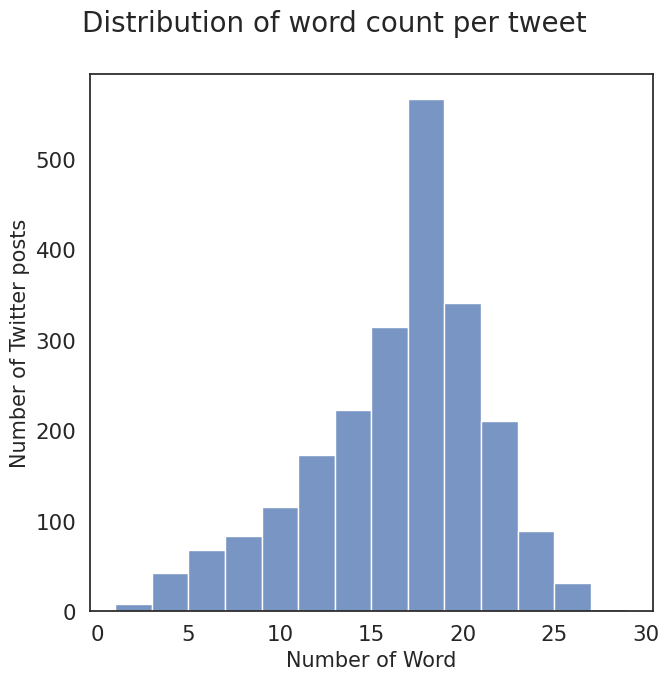

In [22]:
plt.figure(figsize=(7,7))
ax = sns.histplot(data=tweets_df, x="word_count", binwidth=2)
ax.set_xlabel("Number of Word",fontsize=15)
ax.set_ylabel("Number of Twitter posts",fontsize=15)

plt.suptitle("Distribution of word count per tweet", fontsize=20)
plt.tight_layout()  
plt.show()

## 2. Visualizing Daily Volume of Tweets

A revealing step in our exploratory data analysis is to visualize the distribution of tweets over each day. This visual representation can help us detect any unusual temporal patterns or anomalies. For instance, an abnormally high number of tweets on a specific day might signal an issue during the data collection process or a significant event related to the topic.

#### Transforming the `date` Column

Before plotting, we need to ensure that our `date` column is in the right format for temporal analysis. 

1. Convert the `date` column to a datetime format using [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).
2. Once converted, extract just the date (excluding time) using [dt.date](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html).

Let's start with this transformation!


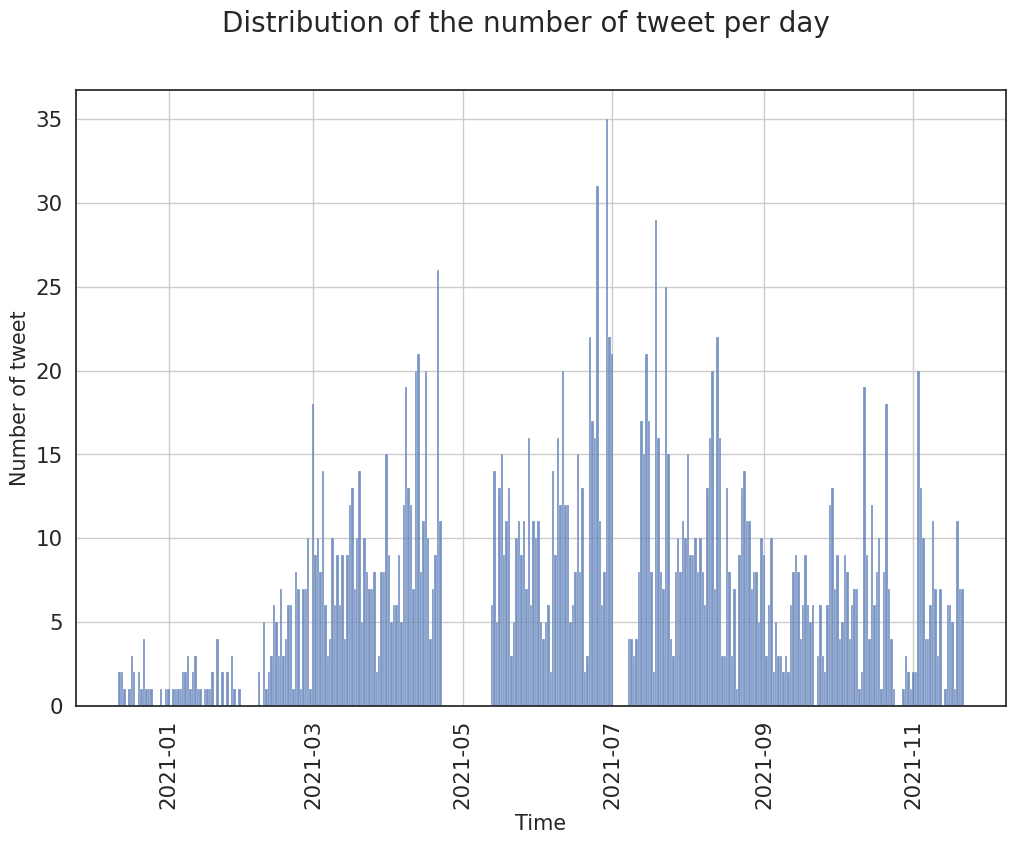

In [23]:
# Convert the 'date' column of the dataframe from a string format to a datetime object.
# Extract only the date part, ignoring the time.
tweets_df['date'] = pd.to_datetime(tweets_df['date']).dt.date


plt.figure(figsize=(12,8))

ax = sns.histplot(data=tweets_df, x="date")

ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Number of tweet",fontsize=15)

plt.suptitle("Distribution of the number of tweet per day", fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

When you observe the distribution of the number of tweets per day, you might notice missing value in the data. Specifically, there could be days where no tweets were collected. This means there might be gaps in your data where certain days might not have any data points.

## 3. Plotting Tweet Counts by Day of the Week

Another insightful visualization would be observing how tweet counts vary across different days of the week. It would be interesting to see if certain days have more activity than others.

**TASK**: Add a new column to your DataFrame named `day_of_week`, which will indicate the day of the week (e.g., Monday, Tuesday, etc.) for each entry based on the `date` column.

### Instructions:
1. Convert the `date` column to the datetime format.
2. Use the datetime column to extract the name of the day of the week. You might find this [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html) helpful.
3. Assign the extracted day names to the new `day_of_week` column.

Proceed with these steps to enrich your DataFrame with the days of the week.


In [24]:
# write your code here

tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Create a new column 'day_of_week' and assign the day names
tweets_df['day_of_week'] = tweets_df['date'].dt.day_name()

# Display the DataFrame with the new 'day_of_week' column
tweets_df['day_of_week']

205784    Wednesday
199055     Saturday
86614        Friday
93951        Friday
101079     Saturday
            ...    
72745        Friday
40659        Monday
188772       Monday
3324       Thursday
212911     Saturday
Name: day_of_week, Length: 2266, dtype: object

In [25]:
# Autograder tests

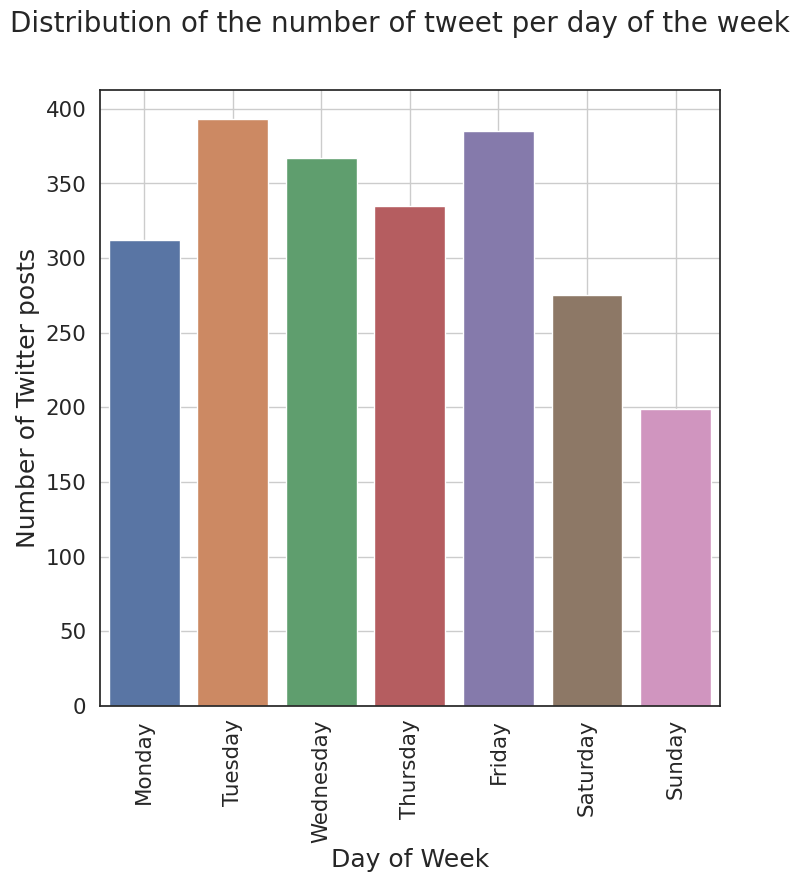

In [26]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=tweets_df, x="day_of_week", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.suptitle("Distribution of the number of tweet per day of the week", fontsize=20)
ax.set_xlabel("Day of Week",fontsize=18)
ax.set_ylabel("Number of Twitter posts",fontsize=18)
plt.xticks(rotation=90)
plt.grid()
plt.show()


## 4. Visualizing Word Frequency with a WordCloud

A WordCloud is a compelling visual representation where the size of each word indicates its frequency or importance in a dataset. Let's utilize the [wordcloud](https://github.com/amueller/word_cloud) library to generate a word cloud for our dataset. This will help us quickly identify the trending and most mentioned words in our tweets.

Below is the procedure to generate this visualization:


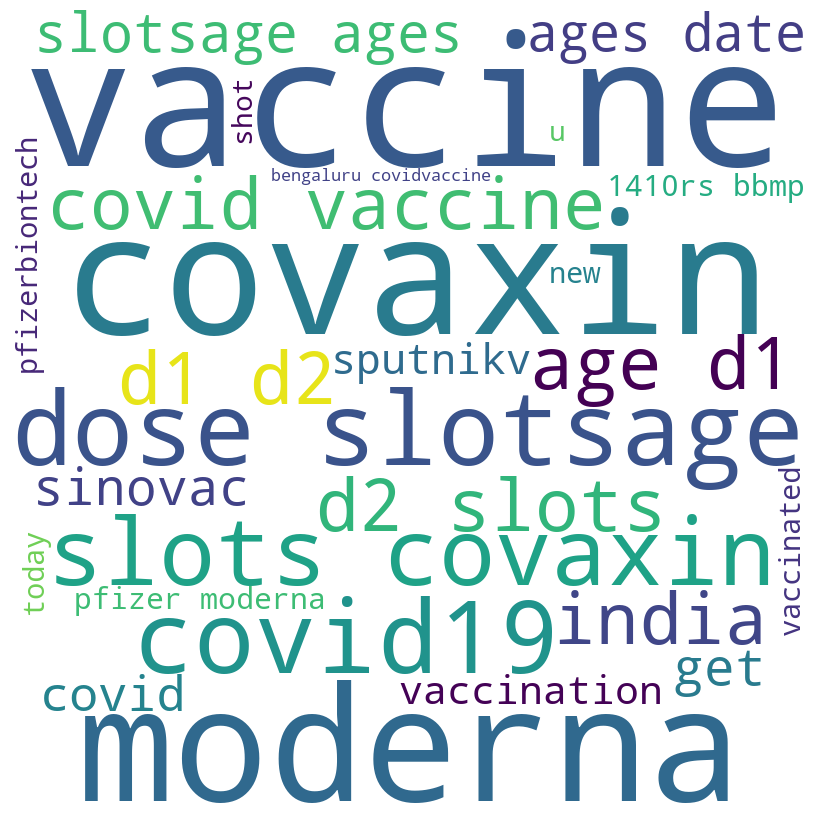

In [27]:
from wordcloud import WordCloud
# iterate through the dataframe
#stopwords_nltk = stopwords.words("english")
comment_words = ''

for sentence in tweets_df.text_non_stop:
     
    # typecaste each val to string
    sentence = str(sentence)
 
    # split the value
    words = sentence.split()
     
    # Converts each words into lowercase
    for i in range(len(words)):
        words[i] = words[i].lower()
     
    comment_words += " ".join(words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Question**: What can you observe from the wordcloud and what are the pros and cons of using wordclounds in your opinion? You might find some ideas from this [article](https://www.alida.com/the-alida-journal/pros-and-cons-word-clouds-visualizations)

Write your answer in the following cell:


Observing the word cloud, it can be noted that the most prominent words are "vaccine," "Covaxin," "Moderna," "dose," "slotsage," and "COVID19," while other words, although less conspicuous, are also present, such as "ages," "date," "today," and "Sinovac." These words are still related to the COVID theme.

Word clouds are effective visual tools that highlight essential information, making brand names and key terms stand out. Their aesthetic appeal creates an engaging and memorable experience, offering a swift and intuitive understanding of textual data. They stimulate interest and serve as an accessible entry point for discussions, especially when communicating research results.
However, word clouds have limitations. Size, determined by frequency, doesn't convey the full picture, as factors like word length and glyph spacing can distort visual interpretation. Caution is advised in relying on word clouds for precise quantitative information.

# 4. Feature extraction and data analysis
## Linguistic Analysis using LIWC lexicon

Since the 1990s, **Linguistic Inquiry and Word Count (LIWC)**, pronounced as "luke", has been a valuable tool for researchers aiming to delve deep into various textual data, unveiling insights from underlying linguistic patterns. This tool, detailed in the [LIWC2007 Language Manual](https://www.liwc.net/LIWC2007LanguageManual.pdf), boasts a rich lexicon comprising grammatical, psychological, and content word categories.

### What Makes LIWC Stand Out?
- **Research Validity**: Established as a reputable text analysis tool within the social sciences realm, LIWC is recognized for categorizing texts along psychological dimensions and even predicting behavioral outcomes [7].
- **Applied NLP Utility**: It's not just for academic research; LIWC serves as a practical tool for applied natural language processing endeavors.

### How Does LIWC Work?
1. **Tokenization**: Initially, the text undergoes tokenization, where words are identified based on separations, such as whitespaces and punctuation marks.
2. **Word Matching**: Post-tokenization, LIWC scans each word to see if it corresponds with any entry in its dictionary. This "match-making" process can be:
   - **Hard Match**: Direct match between word and entry.
   - **Soft Match**: A match through Kleene stems, which are essentially word prefixes ending with a star symbol ("*"). For instance, the dictionary entry "worr*" could match with "worry", or "pizza*" would match with "pizza".

For this assignment, to examine LIWC's capabilities in Python for NLP tasks, we'll harness the power of the [liwc-python](https://github.com/chbrown/liwc-python) library.


In [28]:
# Import Counter from the collections module to help count occurrences of words/categories.
from collections import Counter

# Import the LIWC Python library.
# sources:: https://github.com/chbrown/liwc-python
!pip install liwc
import liwc

# Define a function to tokenize a given text.
def tokenize(text):
    """
    Tokenizes the input text based on word boundaries.
    
    Parameters:
    - text (str): The input text to be tokenized.
    
    Yields:
    - str: Tokens (words) from the input text.
    """
    
    # Use regular expressions to identify word patterns in the text.
    # The pattern r'\w+' matches sequences of word characters.
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

# Define a function to perform LIWC analysis on a given text.
def LIWC_analysis(text, parse):
    """
    Analyzes the input text using the LIWC tool and returns counts of words in various LIWC categories.
    
    Parameters:
    - text (str): The input text to be analyzed.
    - parse (function): The LIWC parser function.
    
    Returns:
    - Counter: A counter object with counts of words in various LIWC categories. 
    refs of Counter object: https://www.geeksforgeeks.org/python-counter-objects-elements/
    """
    # Convert the text to lowercase.
    text = text.lower()
    
    # Tokenize the text.
    sentence_token = tokenize(text)
    
    # Count occurrences of words in various LIWC categories.
    sentence_counts = Counter(category for token in sentence_token for category in parse(token))
    
    return sentence_counts

# Load the LIWC dictionary and create a token parser.
# The parser will be used to classify words into various LIWC categories.
parse, category_names = liwc.load_token_parser(DATA + 'LIWC.dic')

In [29]:
category_names

['funct',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'article',
 'verbs',
 'auxvb',
 'past',
 'present',
 'future',
 'adverbs',
 'prep',
 'conj',
 'negate',
 'quant',
 'numbers',
 'swear',
 'social',
 'family',
 'friends',
 'humans',
 'affect',
 'posemo',
 'negemo',
 'anx',
 'anger',
 'sad',
 'cogmech',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certain',
 'inhib',
 'incl',
 'excl',
 'percept',
 'see',
 'hear',
 'feel',
 'bio',
 'body',
 'health',
 'sexual',
 'ingest',
 'relativ',
 'motion',
 'space',
 'time',
 'work',
 'achiev',
 'leisure',
 'home',
 'money',
 'relig',
 'death',
 'assent',
 'nonflu',
 'filler']

Here is an example how to use it.

In [30]:
gettysburg = '''Four score and seven years ago our fathers brought forth on
  this continent a new nation, conceived in liberty, and dedicated to the
  proposition that all men are created equal. '''.lower()
gettysburg_counts = LIWC_analysis(gettysburg, parse)
print(gettysburg_counts)

Counter({'funct': 15, 'relativ': 7, 'cogmech': 4, 'time': 3, 'social': 3, 'prep': 3, 'space': 3, 'numbers': 2, 'conj': 2, 'incl': 2, 'verbs': 2, 'pronoun': 2, 'ipron': 2, 'article': 2, 'affect': 2, 'posemo': 2, 'quant': 2, 'ppron': 1, 'we': 1, 'family': 1, 'past': 1, 'certain': 1, 'humans': 1, 'auxvb': 1, 'present': 1, 'cause': 1, 'achiev': 1})


In the function **add_LIWC_score**, we iterate over the rows of the dataframe to get LIWC score. Using `LIWC_analysis` function to count LIWC category matches on provided texts (column: `text_cleaned`). Note that the function `LIWC_analysis` return a dtype `Counter`, which is a subclass of python `dictionary`. You can use all the function of `dictionary` such as `dict.keys()` and `dict.values()`. The scores should be stored in Pandas dataframe `df_cp`. insect `pbar.update(1)` at the end of your iterate to track the iterations.


In [31]:
def add_LIWC_score(df, parse, category_names):
    """
    Add LIWC scores to the dataframe for each text content in the 'text_cleaned' column.

    Parameters:
    - df (DataFrame): The input dataframe containing the 'text_cleaned' column.
    - parse (function): The LIWC parser function.
    - category_names (list): List of LIWC category names.

    Returns:
    - DataFrame: A dataframe enriched with LIWC scores.
    """
    
    # Create a deep copy of the dataframe to prevent modifying the original dataframe.
    df_cp = df.copy(deep=True)
    
    # Initialize columns for each LIWC category with zeros.
    for category in category_names:
        df_cp[category] = 0
    
    # Iterate through each row of the dataframe.
    for row in df_cp.itertuples():
        
        # Analyze the 'text_cleaned' content using the LIWC tool.
        score = LIWC_analysis(row.text_cleaned, parse)
        
        # Update the LIWC scores in the dataframe for the current row.
        df_cp.loc[row.Index, list(score.keys())] = list(score.values())
    
    return df_cp


In [32]:
df_LIWC = add_LIWC_score(tweets_df, parse, category_names)
df_LIWC[category_names].head()

,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,work,achiev,leisure,home,money,relig,death,assent,nonflu,filler
205784,9,1,5,5,0,0,0,0,2,0,...,0,1,1,1,0,0,0,0,0,0
199055,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
86614,10,1,2,2,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
93951,6,4,2,0,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
101079,7,0,2,2,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,0


### Aggregating LIWC Word Counts

When using the LIWC tool, it's crucial to remember that the scores represent word counts. To make these scores more interpretable, we'll normalize them based on the total number of words in a given tweet. Then, to capture trends over time, we'll aggregate these normalized scores at the week level.

Steps to Aggregate Word Count:
1. Date Conversion:
Start by converting the `date` column into a datetime format using pd.to_datetime. 

2. Group and Aggregate:
With the adjusted dates, we can now aggregate the data on a weekly basis. We'll use the DataFrame.groupby method along with pd.Grouper to group data by week. Specifically, we'll be considering weeks starting from Mondays.

> If you're unfamiliar with how the groupby function works in pandas, consider reviewing this interactive tutorial. [link](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Acsv%20%3D%20'''%0Abreed,size,weight,height%0ALabrador%20Retriever,medium,67.5,23.0%0AGerman%20Shepherd,large,,24.0%0ABeagle,small,,14.0%0AGolden%20Retriever,medium,60.0,22.75%0AYorkshire%20Terrier,small,5.5,%0ABulldog,medium,45.0,%0ABoxer,medium,,23.25%0APoodle,medium,,16.0%0ADachshund,small,24.0,%0ARottweiler,large,,24.5%0A'''%0Adogs%20%3D%20pd.read_csv%28io.StringIO%28csv%29%29%0A%0A%28dogs%0A%20%20.sort_values%28'size'%29%0A%20%20.groupby%28'size'%29%5B'height'%5D%0A%20%20.agg%28%5B'sum',%20'mean',%20'std'%5D%29%0A%29&d=2022-11-20&lang=py&v=v1)

This code is used for analyzing time series data on a weekly basis, especially when you want to compare data from one week to the previous week.

- First, a subset of the dataframe is selected using columns from the list `category_names`, along with the `date` and `word_count columns`.

- The `.groupby(pd.Grouper(key='date', freq='W-MON'))` function is used to group the data by weeks, with weeks starting on a Monday.

- `.sum().reset_index()` aggregates the data by summing up the values in each group and then resets the index.

- The resulting dataframe is sorted by the `date` column.



In [33]:
# pd.to_datetime(df_LIWC['date']) converts the 'date' column into a datetime format.
df_LIWC['date'] = pd.to_datetime(df_LIWC['date'])

# Aggregate the LIWC scores and word counts on a weekly basis using 'date' as the grouping key.
# The 'W-MON' frequency ensures weeks start on a Monday.
# The result is then sorted by 'date'.
df_LIWC_weekly_sum = df_LIWC[category_names + ['date', 'word_count']] \
    .groupby(pd.Grouper(key='date', freq='W-MON')) \
    .sum() \
    .reset_index() \
    .sort_values('date')

In [34]:
df_LIWC_weekly_sum.head()

,date,funct,pronoun,ppron,i,we,you,shehe,they,ipron,...,achiev,leisure,home,money,relig,death,assent,nonflu,filler,word_count
0,2020-12-14,30,2,1,0,1,0,1,0,2,...,2,0,0,0,0,0,0,0,0,72
1,2020-12-21,60,8,9,1,2,5,0,0,4,...,6,0,0,1,0,0,0,0,2,148
2,2020-12-28,41,5,8,5,2,1,0,0,7,...,3,2,0,2,1,0,0,0,0,117
3,2021-01-04,26,5,4,2,0,1,0,0,4,...,2,0,0,1,0,0,1,0,0,75
4,2021-01-11,89,8,19,13,0,4,1,0,4,...,8,2,2,1,0,0,0,0,0,193


## Task: Normalizing LIWC Scores

With our dataframe `df_LIWC_weekly_sum`, you now have a comprehensive view of the weekly word count and the weekly usage of LIWC lexicons. The next step is to normalize these scores to gain insights into the weekly usage trends.

### Objective:
- Calculate the normalized LIWC score for each week and store the results in a new dataframe named `df_normalized_LIWC_weekly`.

### Instructions:

1. **Initialize the Dataframe**: Start by initializing the dataframe `df_normalized_LIWC_weekly` to store the normalized scores.
   
2. **Iterate and Normalize**: Go through each category in `category_names`.
    - For a given category (e.g., `funct`), compute the ratio between that category's count and the `word_counts` for each week.
    - Store this normalized score in `df_normalized_LIWC_weekly`.
   
3. **Inspect Results**: After computing the normalized scores for all categories, take a look at the first few rows of `df_normalized_LIWC_weekly` to ensure your calculations are correct.



In [35]:
# Initialize the DataFrame to store normalized scores
df_normalized_LIWC_weekly = pd.DataFrame()

df_normalized_LIWC_weekly['date'] = df_LIWC_weekly_sum['date']

# Iterate through each category in category_names
for category in category_names:
    # Compute the ratio between the category's count and word_counts for each week
    df_normalized_LIWC_weekly[category] = df_LIWC_weekly_sum[category] / df_LIWC_weekly_sum['word_count']

In [36]:
# Autograder tests

In [37]:
df_normalized_LIWC_weekly.head()

,date,funct,pronoun,ppron,i,we,you,shehe,they,ipron,...,work,achiev,leisure,home,money,relig,death,assent,nonflu,filler
0,2020-12-14,0.416667,0.027778,0.013889,0.000000,0.013889,0.000000,0.013889,0.0,0.027778,...,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,2020-12-21,0.405405,0.054054,0.060811,0.006757,0.013514,0.033784,0.000000,0.0,0.027027,...,0.027027,0.040541,0.000000,0.000000,0.006757,0.000000,0.0,0.000000,0.0,0.013514
2,2020-12-28,0.350427,0.042735,0.068376,0.042735,0.017094,0.008547,0.000000,0.0,0.059829,...,0.034188,0.025641,0.017094,0.000000,0.017094,0.008547,0.0,0.000000,0.0,0.000000
3,2021-01-04,0.346667,0.066667,0.053333,0.026667,0.000000,0.013333,0.000000,0.0,0.053333,...,0.040000,0.026667,0.000000,0.000000,0.013333,0.000000,0.0,0.013333,0.0,0.000000
4,2021-01-11,0.461140,0.041451,0.098446,0.067358,0.000000,0.020725,0.005181,0.0,0.020725,...,0.005181,0.041451,0.010363,0.010363,0.005181,0.000000,0.0,0.000000,0.0,0.000000


In data visualization and analysis, often we might need to transform our data from a wide format to a long format. The process of melting can assist in this by merging multiple columns.

- Use the **Melting** technique to convert the dataframe `df_normalized_LIWC_weekly` from a wide to a long format, preparing it for subsequent visualization.

1. **Understanding Melting**: 
    - At its core, melting is about reshaping data. The idea is to turn columns into rows.
    - It's particularly useful when your dataframe has columns that are not variables, and you want them to be.

2. **Implementation**:
    - Use the [`pandas.melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function.
    - Set the `id_vars` argument to the column that you want to keep vertical (`date` in our case).
    - The `var_name` argument will be set to a new column name that will store the melted column headers.

3. **Explore**:
    - If you're new to melting or need a refresher, check out this visual [tutorial on melting](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Acsv%20%3D%20'''%0Adate,funct,pronoun,ppron,i%20%20%20%20%0A2020-12-07,8,1,12.04,810.0%0A2020-12-14,4,2,12.3,288.0%0A2020-12-21,6,3,12.04,958.0%0A2020-12-28,2,3,12.6,1057.0%0A2021-01-04,5,2,8.81,700.0%0A'''%0A%0Adogs%20%3D%20pd.read_csv%28io.StringIO%28csv%29%29%0A%0Adogs.melt%28id_vars%3D%5B'date'%5D,%20var_name%3D%22attri%22%29&d=2023-11-12&lang=py&v=v1).



In [38]:
df_summary = pd.melt(df_normalized_LIWC_weekly, ['date'], var_name="attri")
df_summary.head()
df_summary.shape

(3200, 3)

Now let's select some normalized LIWC scores for ploting.

In [39]:
# select attri
df_summary = df_summary[df_summary['attri'].isin(['anger', 'sad', 'fear', 'negemo', 'posemo'])]

Now visualize the weekly change of five categories of LIWC `('anger', 'sad', 'fear', 'negemo', 'posemo')`. 

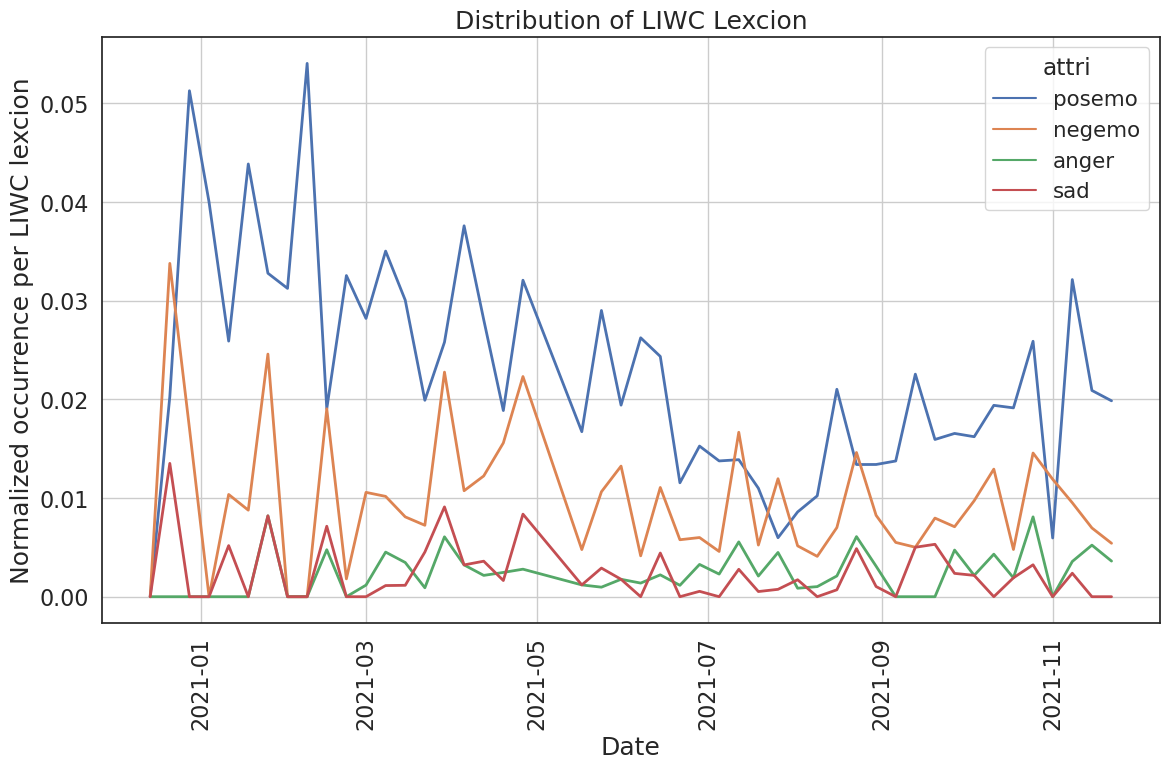

In [40]:
f, ax = plt.subplots(figsize=(12,8))

bar_plot = sns.lineplot(x= 'date', y = 'value', hue='attri' ,data=df_summary, lw=2)

bar_plot.tick_params(axis='both', which='major', labelsize=16)

plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Normalized occurrence per LIWC lexcion',fontsize=18)
plt.title('Distribution of LIWC Lexcion',fontsize=18)
plt.tight_layout()
plt.grid()
plt.show()

Note: When you observe the distribution of the number of tweets per day, you might notice inconsistencies in the data. Specifically, there could be days where no tweets were collected. This means there might be gaps in your data where certain days might not have any data points.

However, when you visualize this using the lineplot function from the Seaborn library, these gaps or missing data points are handled seamlessly. Seaborn's lineplot function has an inherent capability to identify and fill in these missing data points. Instead of showing breaks or discontinuities in the line graph due to absent data, Seaborn produces a continuous line, making the visualization smoother and more comprehensible.


## Observation on Data Distribution
While examining the distribution of the number of tweets per day, you might notice days with no tweets. This is because the `seaborn` lineplot function will automatically handle any missing data points.

## Bonus Task: Exploring the Link Between Positive Wellbeing and Future Orientation
Research suggests a correlation between positive mental wellbeing and a forward-looking perspective [8]. Specifically, individuals discussing future events tend to have a more optimistic outlook compared to those reflecting on past occurrences.

### Instruction:
1. Extract the `future` column from a DataFrame called `df_LIWC_weekly_sum`. This column presumably contains numerical values indicating the frequency or score of future-oriented language in the text analyzed weekly.
2. Calculate `sum_future_past` by adding the `future` and `past` columns of `df_LIWC_weekly_sum`. This creates a combined score of both future and past references.
3. Compute the `forward_looking` metric by dividing the `future` scores by the `sum_future_past`. This yields a proportion that indicates the extent to which the language used is oriented towards the future rather than the past.
4. Plot this `forward_looking` metric as a line plot using seaborn's lineplot function. Set the `date` column from `df_LIWC_weekly_sum` as the x-axis and the `forward_looking` values as the y-axis. 

In [41]:
df_LIWC_weekly_sum.head()

,date,funct,pronoun,ppron,i,we,you,shehe,they,ipron,...,achiev,leisure,home,money,relig,death,assent,nonflu,filler,word_count
0,2020-12-14,30,2,1,0,1,0,1,0,2,...,2,0,0,0,0,0,0,0,0,72
1,2020-12-21,60,8,9,1,2,5,0,0,4,...,6,0,0,1,0,0,0,0,2,148
2,2020-12-28,41,5,8,5,2,1,0,0,7,...,3,2,0,2,1,0,0,0,0,117
3,2021-01-04,26,5,4,2,0,1,0,0,4,...,2,0,0,1,0,0,1,0,0,75
4,2021-01-11,89,8,19,13,0,4,1,0,4,...,8,2,2,1,0,0,0,0,0,193


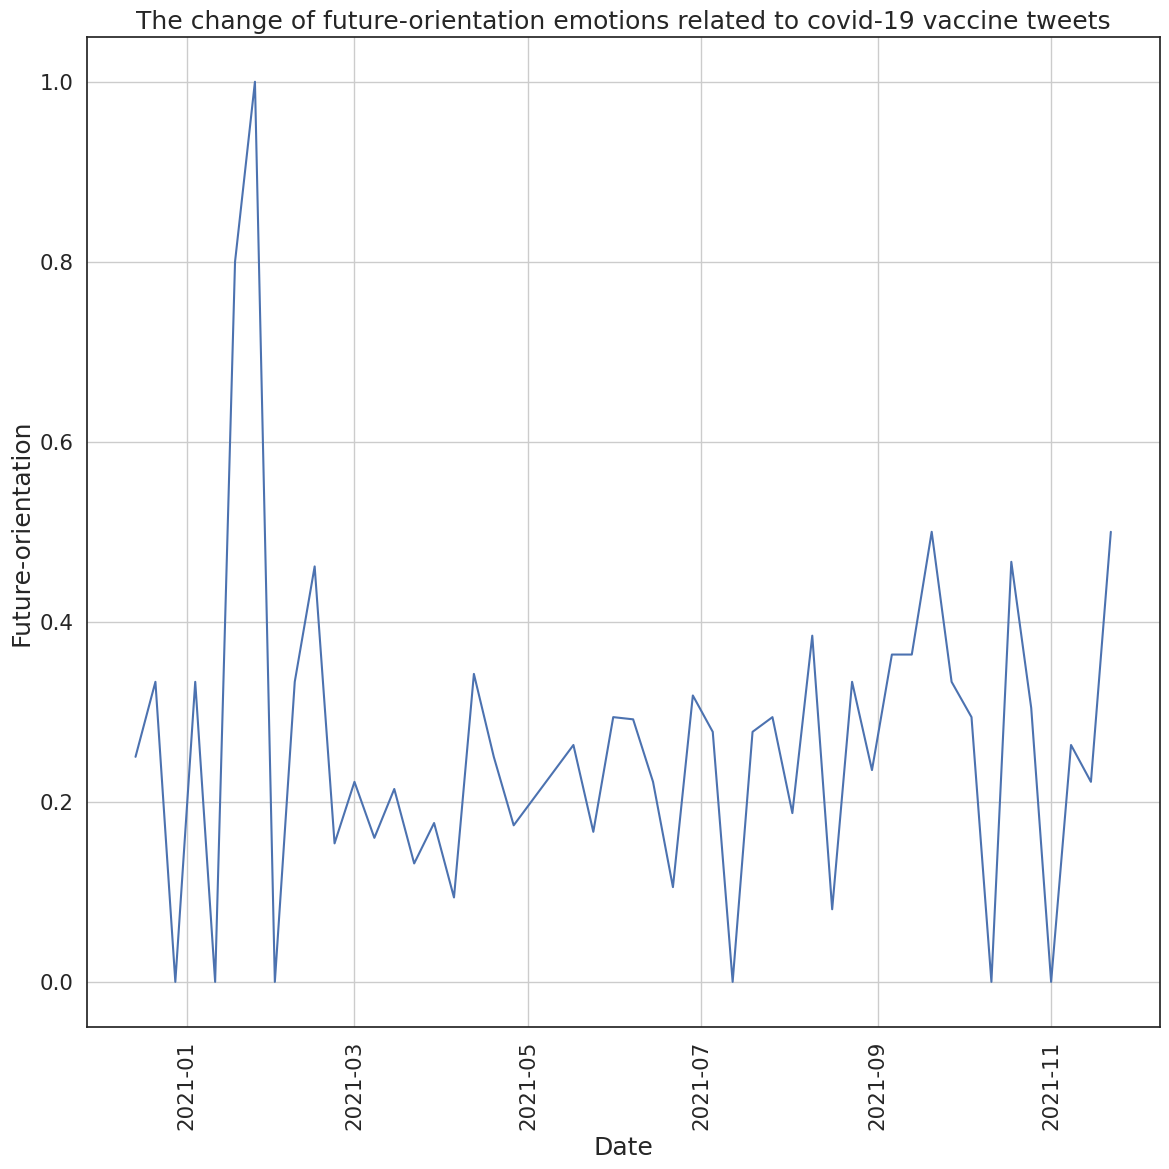

In [42]:
future_column = df_LIWC_weekly_sum['future']

# Calculate sum_future_past by adding 'future' and 'past' columns
df_LIWC_weekly_sum['sum_future_past'] = df_LIWC_weekly_sum['future'] + df_LIWC_weekly_sum['past']

# Compute the forward_looking metric
forward_looking = df_LIWC_weekly_sum['future'] / df_LIWC_weekly_sum['sum_future_past']

# Setting up the plot dimensions
f, ax = plt.subplots(figsize=(12, 12))

# Plotting the forward_looking metric as a line plot
sns.lineplot(x=df_LIWC_weekly_sum['date'], y=forward_looking, ax=ax)


plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Future-orientation', fontsize=18)
plt.title('The change of future-orientation emotions related to covid-19 vaccine tweets', fontsize=18)
plt.tight_layout()
plt.grid()
plt.show()

# Sentiment Analysis Using VADER

#### Loading the Global COVID-19 Confirmed Cases Dataset
Begin by importing the dataset that contains the total number of confirmed COVID-19 cases worldwide.


In [43]:
# Load the global dataset of confirmed COVID-19 cases
df_confirmed_cases = pd.read_csv(DATA + 'time_series_covid19_confirmed_global.csv')

In [44]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,190435,190643,191040,191247,191585,191967,191967,191967,192463,192906
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,325736,326077,326181,326787,327232,327607,327961,328299,328515,328571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269731,269805,269894,269971,270043,270097,270145,270175,270194,270235
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45975,45975,45975,45975,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [45]:
# select the time range that matches our interests  
# calculate the total number of confirmed cases per day and transform the data into a dataframe
df_total_cases = df_confirmed_cases.iloc[:, 329:675].sum(axis=0).to_frame().reset_index().rename(columns={'index':'date', 0:'total_cases'})

In [46]:
df_total_cases.head()

,date,total_cases
0,12/12/20,71932517
1,12/13/20,72471333
2,12/14/20,73022597
3,12/15/20,73671229
4,12/16/20,74388882


## TASK: Computing Daily Increase in COVID-19 Confirmed Cases
Given that our dataset captures the cumulative number of confirmed COVID-19 cases, your objective in this task is to determine the daily increase in these cases.

You'll achieve this by generating a new dataframe, `df_daily_cases`, from `df_total_cases`. Here's a step-by-step breakdown:
1. Set `date` from `df_total_cases` as the index using [pandas.DataFrame.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).
2. Calculate the day-to-day difference using the [pandas.DataFrame.diff()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) function.
3. Reset the index using [pandas.DataFrame.reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).
4. Rename the column `total_cases` to `daily_cases`.


In [47]:
df_total_cases.set_index('date', inplace=True)

# Calculate the day-to-day difference
df_daily_cases = df_total_cases.diff()

# Reset the index
df_daily_cases.reset_index(inplace=True)

# Rename the column
df_daily_cases.rename(columns={'total_cases': 'daily_cases'}, inplace=True)

df_daily_cases.head()

,date,daily_cases
0,12/12/20,NaN
1,12/13/20,538816.0
2,12/14/20,551264.0
3,12/15/20,648632.0
4,12/16/20,717653.0


In [48]:
# Autograder tests

In [49]:
# transfer date format from month/day/year to year-month-day
df_daily_cases['date'] = pd.to_datetime(df_daily_cases['date'], format='%m/%d/%y')
# drop first row
df_daily_cases = df_daily_cases.iloc[1:,:]

In [50]:
# next, aggregate the daily data into weekly data
df_daily_cases['date'] = pd.to_datetime(df_daily_cases['date'])
df_weekly_cases = df_daily_cases \
                    .groupby(pd.Grouper(key='date', freq='W-MON'))['daily_cases'] \
                    .sum().reset_index() \
                    .sort_values('date')

In [51]:
df_weekly_cases = df_weekly_cases.rename(columns={'daily_cases':'weekly_cases'})

In [52]:
df_weekly_cases.head()

,date,weekly_cases
0,2020-12-14,1090080.0
1,2020-12-21,4555579.0
2,2020-12-28,3965328.0
3,2021-01-04,4482484.0
4,2021-01-11,5209822.0


## Performing Sentiment Analysis Using VADER

[VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) is a sentiment analysis tool tailored for social media content. It employs a lexicon and rule-based method, similar to TextBlob, but with added advantages to handle the nuances of social media language. Some challenges in social media sentiment analysis include short text fragments, slang, acronyms, and abbreviations, all of which VADER is adept at processing. 

VADER provides scores for negative, neutral, and positive sentiments. Additionally, it calculates a compound score, which is a holistic, weighted sentiment indication of the text.

Below, we'll demonstrate using VADER to assess sentiments in our data.


The `polarity_scores()` function in VADER returns the metric values of the negative, neutral, positive, and compound for a given sentence. The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1 and +1 where -1 indicates most extreme negative and +1 indicates most extreme positive. A common threshold is to set compound score >= 0.05 as positive, <= -0.05 as negative and between -0.05 and 0.05 as neutral, indicated by previous [research](https://www.researchgate.net/publication/333602124_A_Comprehensive_Study_on_Lexicon_Based_Approaches_for_Sentiment_Analysis).

In [53]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment scores for a given text
def sentiment_analyzer(x):
    return analyzer.polarity_scores(x)

# Function to classify sentiment based on the compound score
def sentiment_Classification(x):
    if x['compound'] >= 0.05:
        return 'positive'
    elif  (x['compound'] > -0.05) and (x['compound'] < 0.05):
        return 'neutral'
    elif x['compound'] <= -0.05  :
        return 'negative'

# Applying the sentiment analyzer to get sentiment scores for each text in 'text_cleaned' column
tweets_df['sentiment'] = tweets_df['text_cleaned'].apply(sentiment_analyzer)

# Classifying the sentiment scores into categories: 'positive', 'neutral', and 'negative'
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_Classification)


In [54]:
tweets_df['sentiment'] = tweets_df['text_cleaned'].apply(sentiment_analyzer)
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_Classification)

In [55]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik, AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

#### TASK: Identifying Vaccine References in Tweets

Your objective in this task is to check if a tweet mentions a specific vaccine by referencing a set of predetermined tags.

Steps:
1. Iterate over the list of reference tags.
2. Determine if a tag appears in the tweet. While the example uses [str.find](https://www.w3schools.com/python/ref_string_find.asp), other methods are also acceptable.
3. Return 1 if the vaccine is mentioned, and 0 otherwise.

Let's dive into the implementation:


In [56]:
# Define the refer function to check for vaccine references in tweets
def refer(tweet, refs):
    flag = 0
    
    # Iterate over the list of reference tags
    for ref in refs:
        # Check if the reference appears in the lowercase tweet
        #if ref.lower() in tweet.lower():
        if ref in tweet:
            flag = 1
            break  # Exit the loop if any reference is found

    return flag

# Applying the refer function to identify mentions of specific vaccines in the 'text_cleaned' column
tweets_df['pfizer'] = tweets_df['text_cleaned'].apply(lambda x: refer(x, pfizer_refs))
tweets_df['bbiotech'] = tweets_df['text_cleaned'].apply(lambda x: refer(x, bbiotech_refs))
tweets_df['sputnik'] = tweets_df['text_cleaned'].apply(lambda x: refer(x, sputnik_refs))
tweets_df['astra'] = tweets_df['text_cleaned'].apply(lambda x: refer(x, astra_refs))
tweets_df['moderna'] = tweets_df['text_cleaned'].apply(lambda x: refer(x, moderna_refs))


In [57]:
# Autograder tests


In [58]:
df_vaccine = tweets_df[['date','pfizer','bbiotech','sputnik','astra','moderna','sentiment_category']]

In [59]:
df_vaccine.head()

,date,pfizer,bbiotech,sputnik,astra,moderna,sentiment_category
205784,2021-10-13,1,0,0,0,0,positive
199055,2021-10-09,0,1,1,0,0,neutral
86614,2021-05-28,0,0,0,0,0,neutral
93951,2021-06-04,1,1,0,0,1,positive
101079,2021-06-12,0,0,0,0,0,positive


#### Reshaping Data with `pandas.melt`

Our objective is to transform our dataset into a longer format using `pandas.melt`.

If you're new to melting or need a refresher, check out this visual [tutorial on melting](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Acsv%20%3D%20'''%0Adate,funct,pronoun,ppron,i%20%20%20%20%0A2020-12-07,8,1,12.04,810.0%0A2020-12-14,4,2,12.3,288.0%0A2020-12-21,6,3,12.04,958.0%0A2020-12-28,2,3,12.6,1057.0%0A2021-01-04,5,2,8.81,700.0%0A'''%0A%0Adogs%20%3D%20pd.read_csv%28io.StringIO%28csv%29%29%0A%0Adogs.melt%28id_vars%3D%5B'date'%5D,%20var_name%3D%22attri%22%29&d=2023-11-12&lang=py&v=v1).

Now, let's proceed to reshape our vaccine data.


In [60]:
# Melt the vaccine data, preserving 'date' and 'sentiment_category' columns, while melting others into a new column named 'attri'
sentiment_summary_daily = pd.melt(df_vaccine, ['date','sentiment_category'], var_name="attri")
sentiment_summary_daily.head()


,date,sentiment_category,attri,value
0,2021-10-13,positive,pfizer,1
1,2021-10-09,neutral,pfizer,0
2,2021-05-28,neutral,pfizer,0
3,2021-06-04,positive,pfizer,1
4,2021-06-12,positive,pfizer,0


In [61]:
sentiment_summary_daily = sentiment_summary_daily[sentiment_summary_daily['value'] == 1]

sentiment_summary_daily.head()
sentiment_summary_daily.shape

(2333, 4)

## Aggregating Data by Week, Vaccine, and Sentiment Category

To generate a weekly summary, we need to group our data by week, vaccine type, and sentiment. This will help us visualize the overall sentiment trends for each vaccine over time.


In [62]:
sentiment_summary_daily['date'] = pd.to_datetime(sentiment_summary_daily['date'])

# Group by week, vaccine (attri), and sentiment category, then count the number of occurrences
sentiment_summary_weekly = sentiment_summary_daily \
                            .groupby([pd.Grouper(key='date', freq='W-MON'), 'attri', 'sentiment_category']) \
                            .agg(['count'])

# Reset the index of the aggregated DataFrame for better accessibility
sentiment_summary_weekly.reset_index(inplace=True)


In [63]:
sentiment_summary_weekly

,date,attri,sentiment_category,value
,,,,count
0,2020-12-14,pfizer,neutral,3
1,2020-12-14,sputnik,neutral,2
2,2020-12-21,moderna,positive,1
3,2020-12-21,pfizer,negative,2
4,2020-12-21,pfizer,neutral,2
...,...,...,...,...
487,2021-11-22,pfizer,negative,1
488,2021-11-22,pfizer,neutral,1
489,2021-11-22,pfizer,positive,3


In [64]:
# change column name from value to count
sentiment_summary_weekly.columns = ['date','attri','sentiment_category','count']
sentiment_summary_weekly.head()

,date,attri,sentiment_category,count
0,2020-12-14,pfizer,neutral,3
1,2020-12-14,sputnik,neutral,2
2,2020-12-21,moderna,positive,1
3,2020-12-21,pfizer,negative,2
4,2020-12-21,pfizer,neutral,2


The purpose of this code block is to calculate the number of tweets that occurred each week. The resulting DataFrame, `df_weekly_tweet`, then be used for normalization.

In [65]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Group by the adjusted week date and count the number of tweets for that week
df_weekly_tweet = tweets_df.groupby(pd.Grouper(key='date', freq='W-MON'))['text_cleaned'].count().reset_index()

# Rename columns for clarity
df_weekly_tweet.rename(columns={'text_cleaned':'weekly_tweet', 'date':'date'}, inplace=True)
df_weekly_tweet.head()

,date,weekly_tweet
0,2020-12-14,5
1,2020-12-21,9
2,2020-12-28,7
3,2021-01-04,5
4,2021-01-11,12


## Merge and Calculate Percentage of Weekly Tweets by Sentiment

#### Task:
1. Merge the weekly tweet count (from `df_weekly_tweet`) with the sentiment summary (from `sentiment_summary_weekly`) based on the `date` column.
2. After merging the operation, calculate the percentage of tweets for each sentiment category in relation to the total weekly tweets. The result should be saved in a column `percentage` of sentiment_summary_weekly_merged.

This will give us an idea of the distribution of sentiments across the weekly tweets


In [66]:
 sentiment_summary_weekly.head(2)

,date,attri,sentiment_category,count
0,2020-12-14,pfizer,neutral,3
1,2020-12-14,sputnik,neutral,2


In [67]:
df_weekly_tweet.head(2)

,date,weekly_tweet
0,2020-12-14,5
1,2020-12-21,9


In [77]:
# Initialize the merged dataframe as None
# Merge the sentiment_summary_weekly with df_weekly_tweet based on the 'date' column
#The merge() function is used to combine two dataframes based on a common column. In this case, the merging is done using the date column.
#The how='left' argument specifies a left join. This means that all the rows from sentiment_summary_weekly will be included in the merged dataframe, and for any date that doesn't exist in df_weekly_tweet, the corresponding columns will contain NaN values.

# Merge the sentiment_summary_weekly with df_weekly_tweet based on the 'date' column
sentiment_summary_weekly_merged = pd.merge(df_weekly_tweet, sentiment_summary_weekly, on='date', how='left')

# Calculate the percentage of tweets for each sentiment category in relation to the total weekly tweets
sentiment_categories = ['positive', 'neutral', 'negative']

for sentiment_category in sentiment_categories:
    percentage_column_name = f'percentage_{sentiment_category}_tweets'
    
    # Check if the sentiment_category column exists in the merged DataFrame
    if 'sentiment_category' in sentiment_summary_weekly_merged.columns:
        # Filter rows based on the current sentiment category
        category_mask = sentiment_summary_weekly_merged['sentiment_category'] == sentiment_category
        print(category_mask.shape)
        # Calculate the percentage and assign it to the new column
        sentiment_summary_weekly_merged.loc[category_mask, percentage_column_name] = ((sentiment_summary_weekly_merged.loc[category_mask, 'weekly_tweet'] / sentiment_summary_weekly_merged.loc[category_mask, 'weekly_tweet'].sum()) * 100)

(494,)
(494,)
(494,)


In [86]:
# Merge the sentiment_summary_weekly with df_weekly_tweet based on the 'date' column
sentiment_summary_weekly_merged = pd.merge(df_weekly_tweet, sentiment_summary_weekly, on='date', how='left')

# Calculate the percentage of tweets for each sentiment category
sentiment_categories = ['positive', 'neutral', 'negative']

for category in sentiment_categories:
    # Create a new column for each sentiment category
    sentiment_summary_weekly_merged[f'percentage_{category}_tweets'] = (
        sentiment_summary_weekly_merged['sentiment_category'].eq(category) * sentiment_summary_weekly_merged['count'] / sentiment_summary_weekly_merged['weekly_tweet'] * 100)

# If you want to handle possible NaN values in the result, you can fill them with 0
sentiment_summary_weekly_merged = sentiment_summary_weekly_merged.fillna(0)


sentiment_summary_weekly_merged.head(7)

,date,weekly_tweet,attri,sentiment_category,count,percentage_positive_tweets,percentage_neutral_tweets,percentage_negative_tweets
0,2020-12-14,5,pfizer,neutral,3.0,0.000000,60.000000,0.000000
1,2020-12-14,5,sputnik,neutral,2.0,0.000000,40.000000,0.000000
2,2020-12-21,9,moderna,positive,1.0,11.111111,0.000000,0.000000
3,2020-12-21,9,pfizer,negative,2.0,0.000000,0.000000,22.222222
4,2020-12-21,9,pfizer,neutral,2.0,0.000000,22.222222,0.000000
5,2020-12-21,9,pfizer,positive,4.0,44.444444,0.000000,0.000000
6,2020-12-21,9,sputnik,neutral,2.0,0.000000,22.222222,0.000000


In [80]:
# Autograder tests

In [81]:
sentiment_summary_weekly_negative = sentiment_summary_weekly_merged[sentiment_summary_weekly_merged['sentiment_category'] == 'negative']
sentiment_summary_weekly_positive = sentiment_summary_weekly_merged[sentiment_summary_weekly_merged['sentiment_category'] == 'positive']

#### Plotting Negative Tweet Sentiments against Weekly Increase in COVID-19 Cases

In this task, you are required to:

1. Create a figure with 6 subplots arranged in a 2x3 grid (2 rows, 3 columns).
2. For each subplot, plot the weekly percentage of negative tweets related to a specific vaccine.
3. Overlay the primary y-axis (on the left) that shows the sentiment data with a secondary y-axis (on the right) that shows the weekly increase in COVID-19 cases.

This visualization will help in understanding the correlation between public sentiment on vaccines and the progression of the pandemic.

1. Set up a figure with subplots arranged in 2 rows and 3 columns, with a shared y-axis for comparability, and set the figure size to 30x20 inches.
Assign a main title to the figure - 'Sentiment Analysis of Tweets about 5 Vaccines' - and set the font size to 32.
2. Since there are only 5 vaccines to plot, remove the unnecessary sixth subplot (located at the second row, third column) to avoid a blank plot.
3. Iterate over the unique values in the `attri` column of the `sentiment_summary_weekly_negative` DataFrame, which contains the names of the vaccines.
4. For each vaccine:
    #### Task:
    - Create a seaborn's lineplot on the primary y-axis (`ax`) showing the percentage of negative tweets over time. Set the 'date' on the x-axis and the 'percentage' of negative tweets on the y-axis for the current vaccine. Set the line color to 'steelblue'.
    - Create a secondary y-axis to the right side of each subplot (hint: Do this by calling the ax_r = ax.twinx(). Hint:[ax.twinx()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)). 
    - Plot the weekly COVID-19 cases using seaborn's lineplot with `date` on the x-axis and `weekly_cases` on the y-axis. Using data from a DataFrame `df_weekly_cases` and `ax_r` to plot a lineplot of the weekly COVID-19 cases. Set the line color for this plot to 'darksalmon' and the y-axis limits between 2,400,000 and 6,800,000.



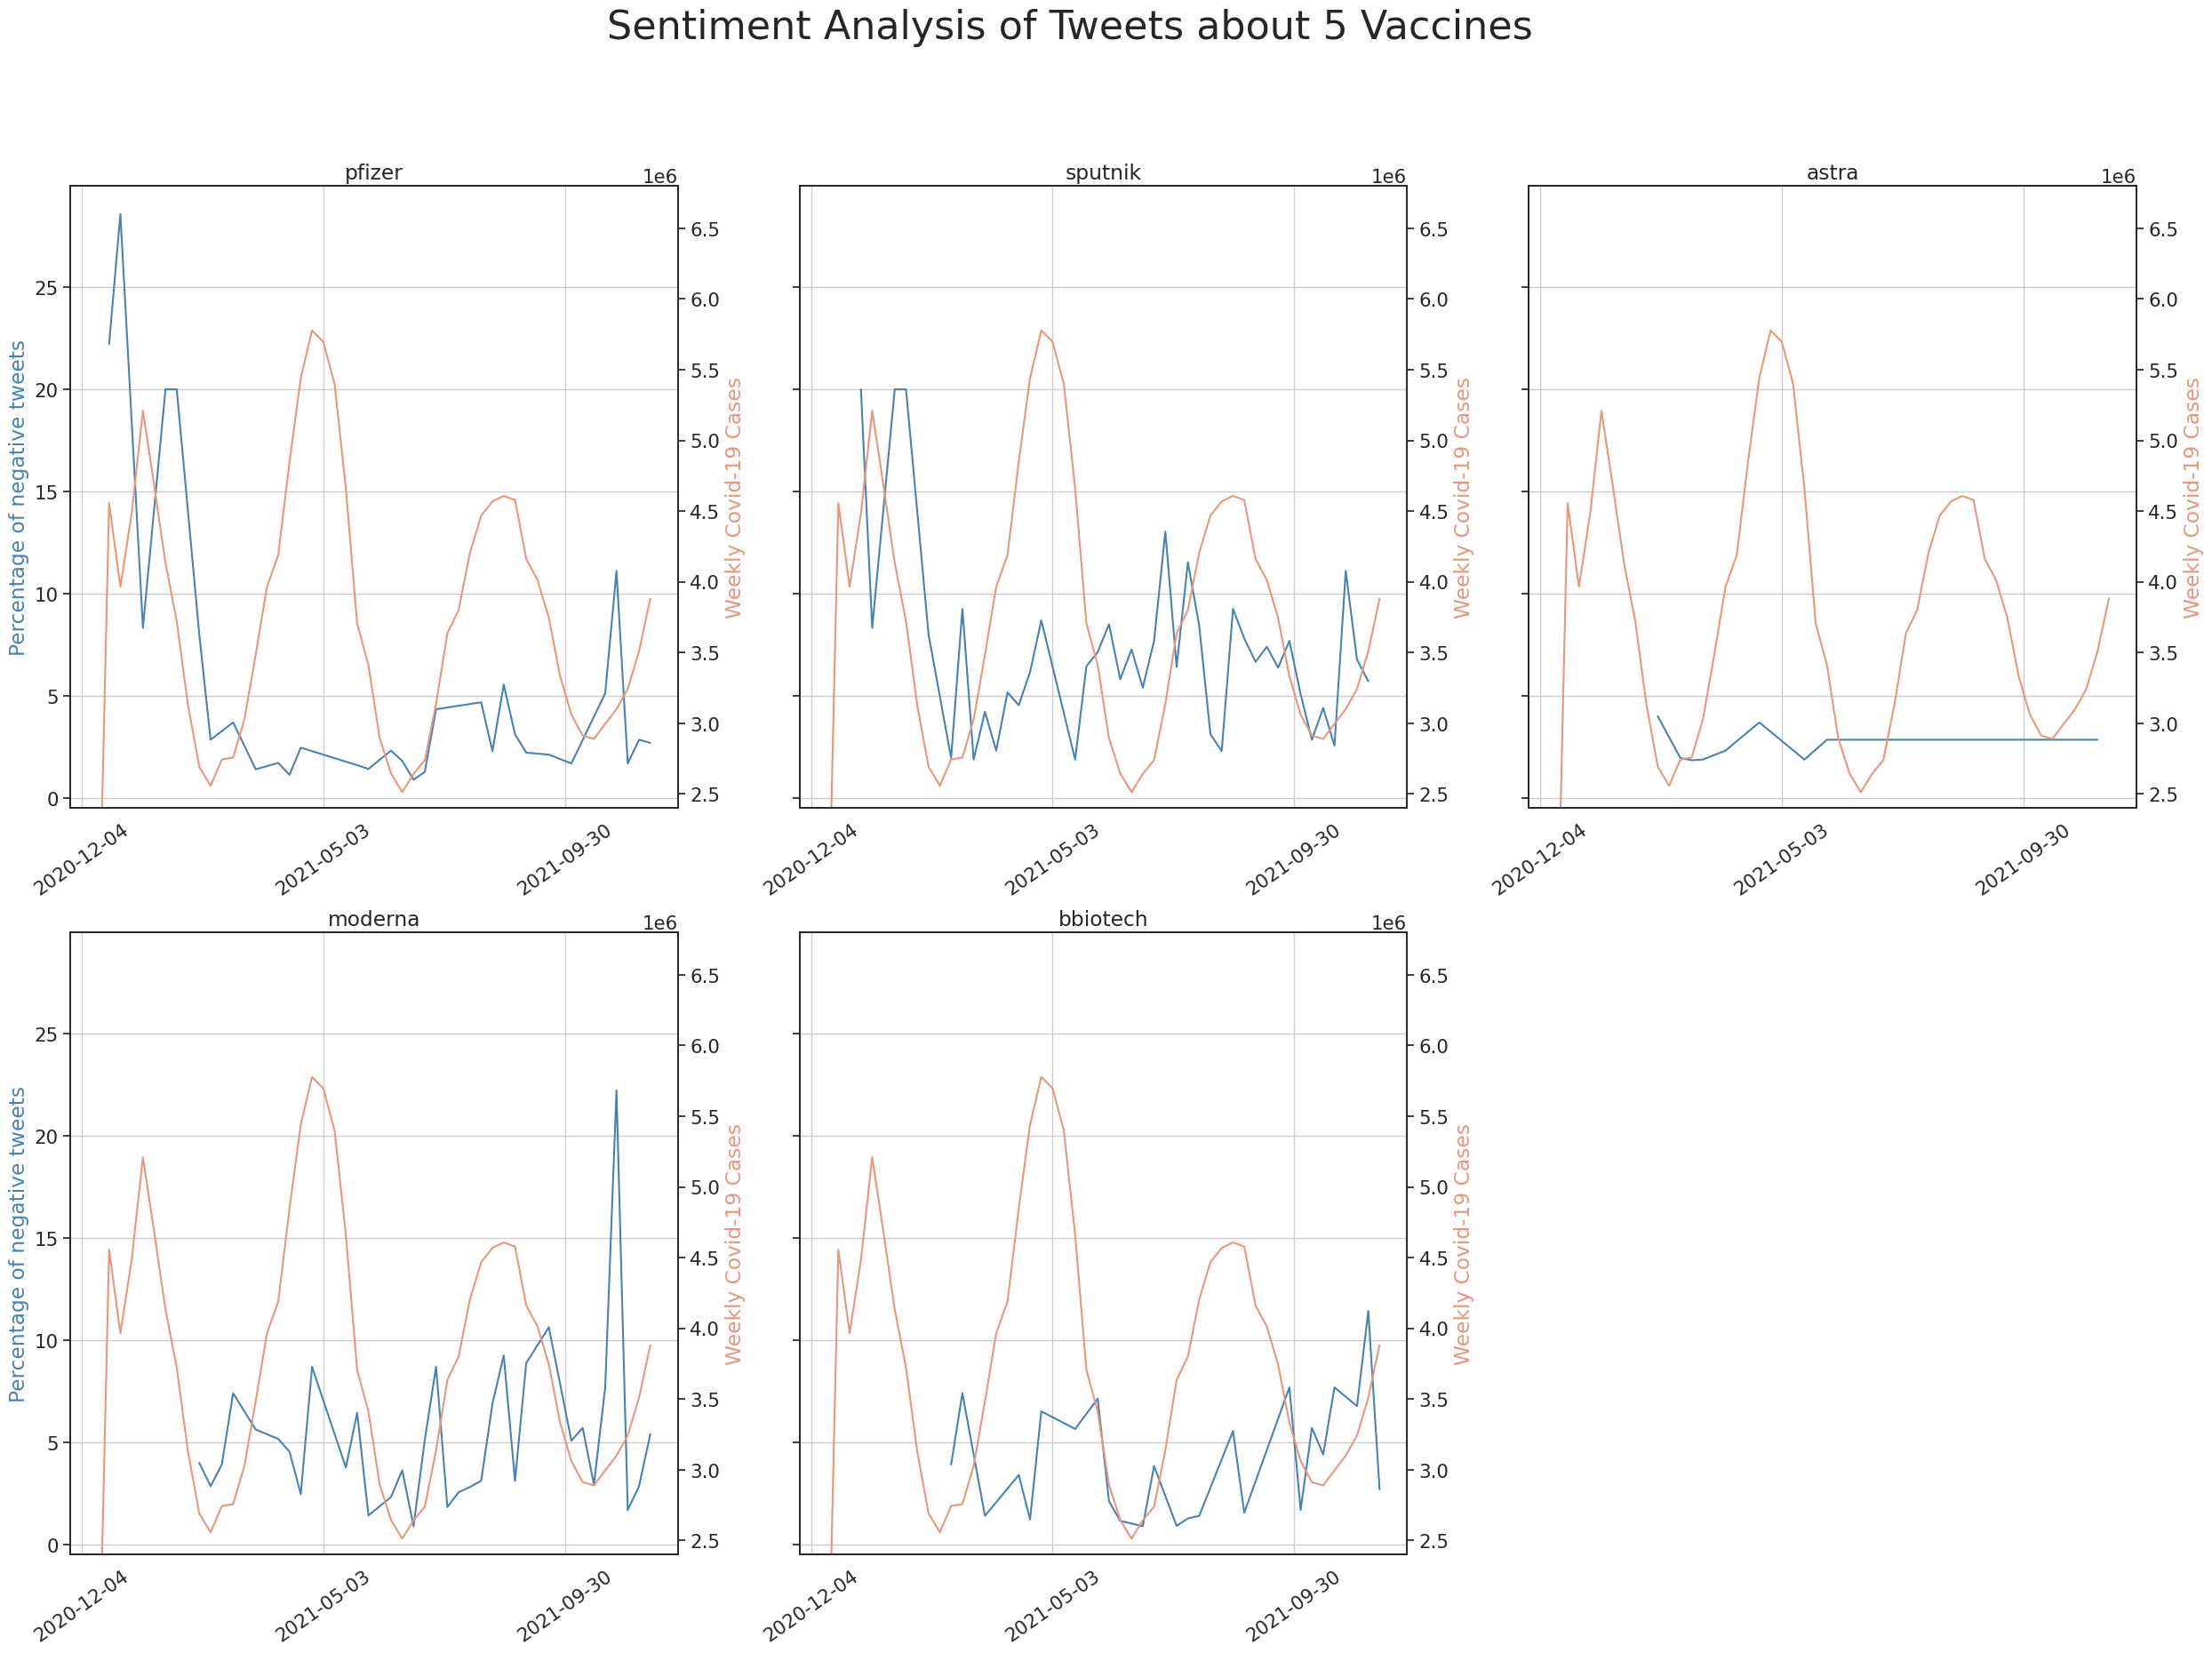

In [88]:
# plot 5 subplots for 5 vaccines in two rows
fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharey=True)
fig.suptitle('Sentiment Analysis of Tweets about 5 Vaccines', fontsize=32)

# plot the percentage of negative tweets for each vaccine
fig.delaxes(ax=axes[1, 2])

# iterate over the vaccines
for i, vaccine in enumerate(sentiment_summary_weekly_negative['attri'].unique()):
    # plot the sentiment summary for each vaccine
    ax = axes[i // 3, i % 3]
    ax_r = ax.twinx()

    # Filter data for the current vaccine
    data_for_vaccine = sentiment_summary_weekly_negative[sentiment_summary_weekly_negative['attri'] == vaccine]

    # Plot the percentage of negative tweets over time
    sns.lineplot(data=data_for_vaccine, x='date', y=f'percentage_negative_tweets', color='steelblue', ax=ax)

    # Plot weekly COVID-19 cases
    sns.lineplot(data=df_weekly_cases, x='date', y='weekly_cases', color='darksalmon', ax=ax_r)
    
    # Set y-axis limits for the secondary axis
    ax_r.set_ylim(2400000, 6800000)

    # Rotate the x tick labels
    ax_r.set_ylabel('Weekly Covid-19 Cases', color='darksalmon')

    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.tick_params(axis='x', labelrotation=35)

    ax.set_title(vaccine)
    ax.set_ylabel('Percentage of negative tweets', color='steelblue')
    # ax.set_xlabel('date')
    # not show x label
    ax.set_xlabel('')
    ax.grid()


# References

[1] Koustuv Saha, Jordyn Seybolt, Stephen M Mattingly, Talayeh Aledavood, Chaitanya Konjeti, Gonzalo J Martinez, Ted Grover, Gloria Mark, and Munmun De Choudhury. 2021. What life events are disclosed on social media, how, when, and by whom?. In Proceedings of the 2021 CHI conference on human factors in computing systems. 1–22. 

[2] Munmun De Choudhury, Michael Gamon, Scott Counts, and Eric Horvitz. 2013. Predicting depression via social media. (2013). 

[3] Glen Coppersmith, Ryan Leary, Patrick Crutchley, and Alex Fine. 2018. Natural language processing of social media as screening for suicide risk. Biomedical informatics insights 10 (2018), 1178222618792860.

[4] Gaurav Verma, Ankur Bhardwaj, Talayeh Aledavood, Munmun De Choudhury, and Srijan Kumar. 2022. Examining the impact of sharing COVID-19 misinformation online on mental health. Scientific Reports 12, 1 (2022), 1–9

[5] “Exploratory Data Analysis,” Wikipedia, 05-Sep-2023.  [Online]. Available: https://en.wikipedia.org/wiki/Exploratory_data_analysis. [Accessed: 18-Sep-2023] 

[6] Ríssola, Esteban A., Mohammad Aliannejadi, and Fabio Crestani. "Mental disorders on online social media through the lens of language and behaviour: Analysis and visualisation." Information processing & management 59.3 (2022): 102890.

[7] Chancellor, Stevie, and Munmun De Choudhury. "Methods in predictive techniques for mental health status on social media: a critical review." NPJ digital medicine 3.1 (2020): 43.

[8] Wadden, David, et al. "The effect of moderation on online mental health conversations." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 15. 2021.